In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import pickle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [2]:
import xgboost as xgb
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Sequential
from collections import Counter
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

KeyboardInterrupt: 

In [3]:
df=pd.read_csv('SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


### Extractin date from data column

In [5]:
df['Data']=df['Data'].apply(lambda x:x.split()[0])

In [6]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


### Extracting month,day,hour,minute,second form data column

In [7]:
df['month']=pd.to_datetime(df['Data']).dt.month
df['day']=pd.to_datetime(df['Data']).dt.day
df['hour']=pd.to_datetime(df['Time']).dt.hour
df['minute']=pd.to_datetime(df['Time']).dt.minute
df['second']=pd.to_datetime(df['Time']).dt.second

C:\Users\Ramtej\AppData\Local\Temp\ipykernel_12280\837001388.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour']=pd.to_datetime(df['Time']).dt.hour
C:\Users\Ramtej\AppData\Local\Temp\ipykernel_12280\837001388.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['minute']=pd.to_datetime(df['Time']).dt.minute
C:\Users\Ramtej\AppData\Local\Temp\ipykernel_12280\837001388.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['second']=pd.to_datetime(df['Time']).dt.second


In [8]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,hour,minute,second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


### extracting seconds,minutes,hours from TimeSunrise,TimeSunset using regular Expressions

In [9]:
df['risehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

### Dropping irrelavent columns Unix_Time,Data,Time,TimeSunRise,TimeSunSet

In [10]:
df.drop(['UNIXTime','Data','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [11]:
df.drop(['Time'],axis=1,inplace=True)

In [12]:
df.shape

(32686, 15)

In [13]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,risehour,riseminuter,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


### Feature selection using correlation matrix

<Axes: >

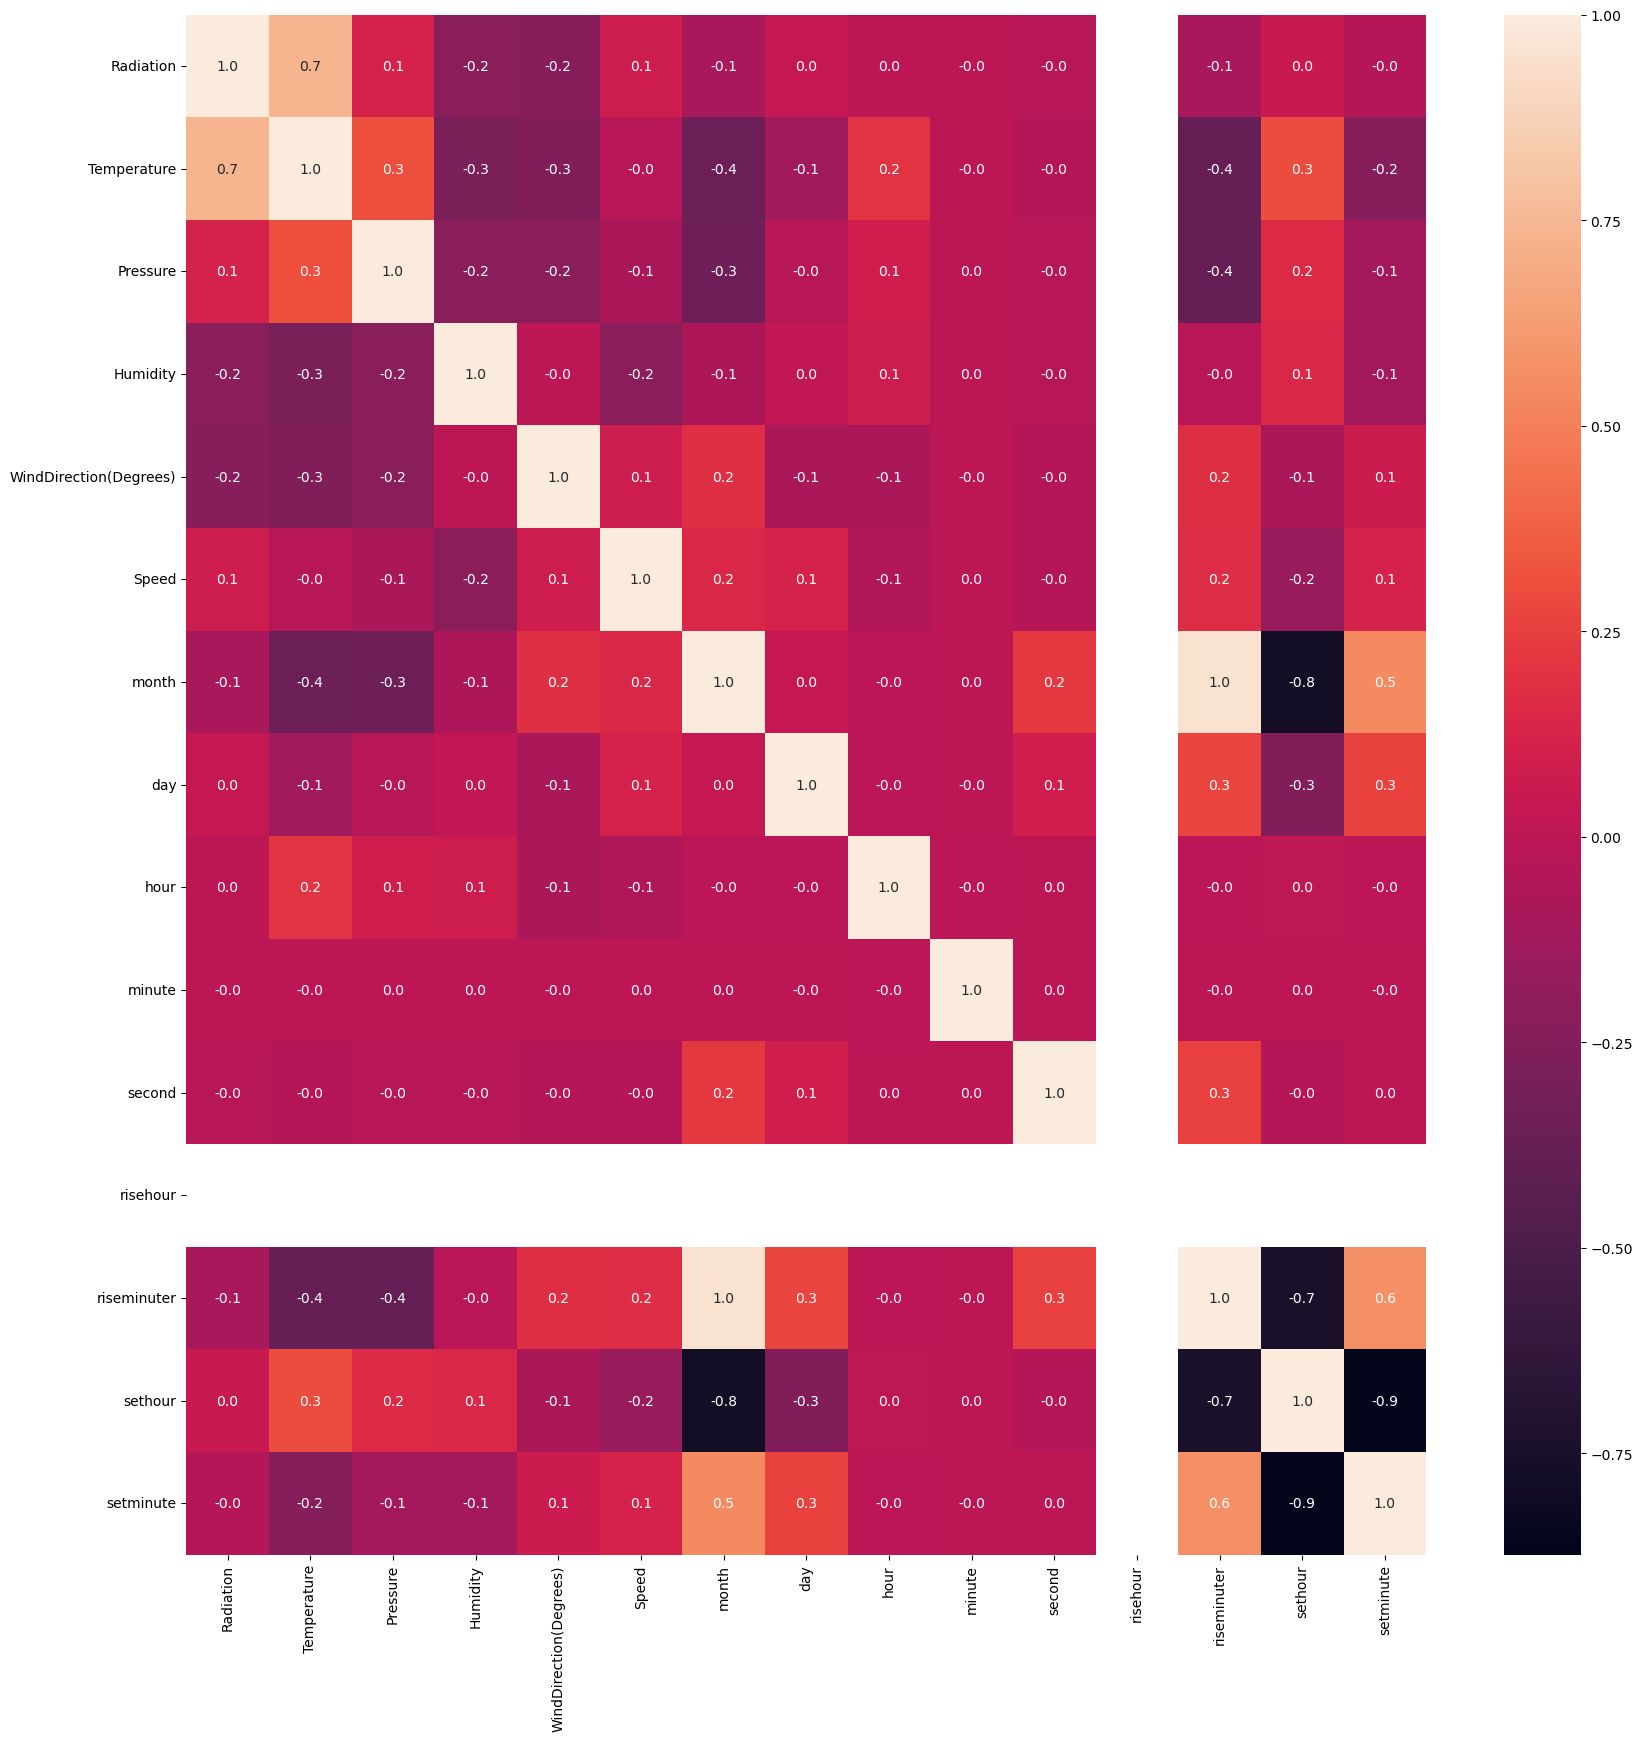

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1f')

In [15]:
input_features=df.drop(['Radiation'],axis=1)
target=df['Radiation']

### Feature selection using SelectKbeast mathod

In [16]:
best_features=SelectKBest(score_func=chi2,k=10)

#### It works on the target label but instead we are passsing continuous float values to it. So, we need to convert our data to label form and there are two methods as follows:

#### .usign LabelEncoder
#### .multiplying the data by 100 and converting it to int which can be treated as labels by the model

In [17]:
from sklearn.preprocessing import LabelEncoder
train_y=LabelEncoder().fit_transform(target)

In [18]:
train_y

array([ 9,  9, 11, ...,  8, 11,  8], dtype=int64)

In [19]:
target_count=df['Radiation'].apply(lambda x:int(x*100))

In [20]:
scaled_input_features=MinMaxScaler().fit_transform(input_features)
fit=best_features.fit(scaled_input_features,target_count)

### making dataframe

In [21]:
scores=pd.DataFrame(fit.scores_)
column=pd.DataFrame(input_features.columns)

In [22]:
feat_imp=pd.concat([column,scores],axis=1)

In [23]:
feat_imp.columns=['features','feature_imp']

In [24]:
feat_imp.sort_values(by='feature_imp',ascending=False,inplace=True)
feat_imp

,features,feature_imp
12,sethour,12207.531454
5,month,4684.579610
11,riseminuter,4015.062771
3,WindDirection(Degrees),3271.827277
6,day,2841.926850
8,minute,2702.449333
9,second,2288.673032
13,setminute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'sethour'),
  Text(1, 0, 'month'),
  Text(2, 0, 'riseminuter'),
  Text(3, 0, 'WindDirection(Degrees)'),
  Text(4, 0, 'day'),
  Text(5, 0, 'minute'),
  Text(6, 0, 'second'),
  Text(7, 0, 'setminute'),
  Text(8, 0, 'Temperature'),
  Text(9, 0, 'Humidity'),
  Text(10, 0, 'Speed'),
  Text(11, 0, 'hour'),
  Text(12, 0, 'Pressure'),
  Text(13, 0, 'risehour')])

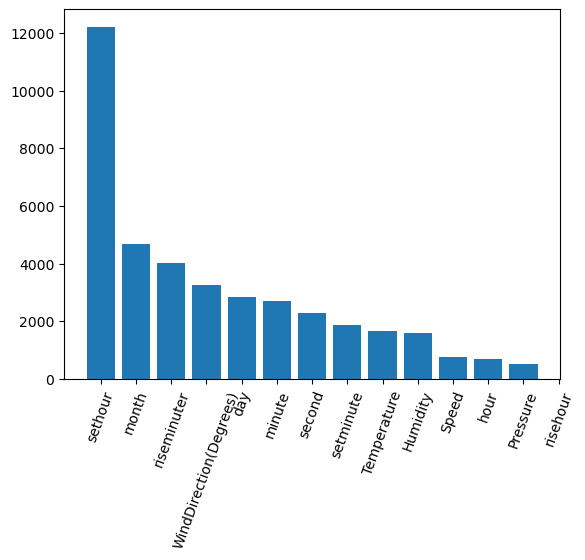

In [25]:
plt.bar(feat_imp.features,feat_imp.feature_imp)
plt.xticks(rotation=70)

### Feature Engineering with BoxCox,MinMax,Standard Scaler

C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


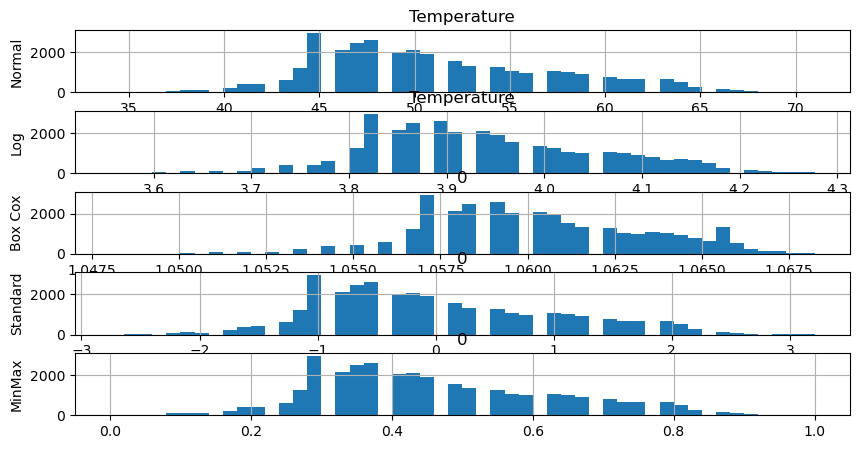

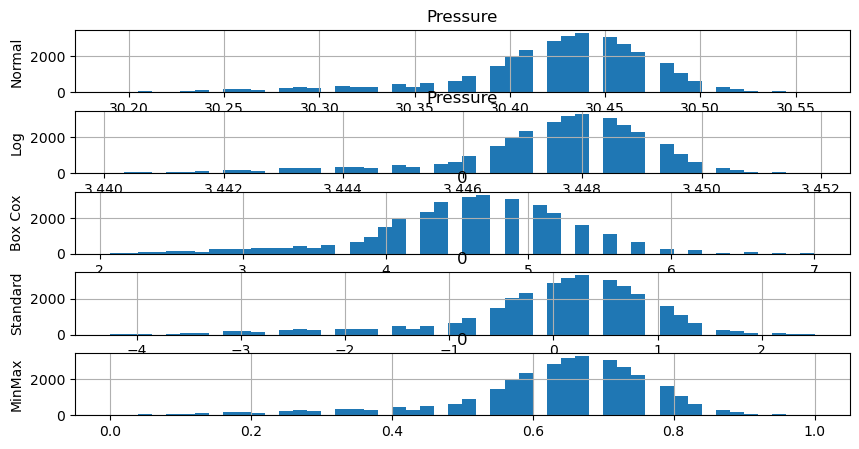

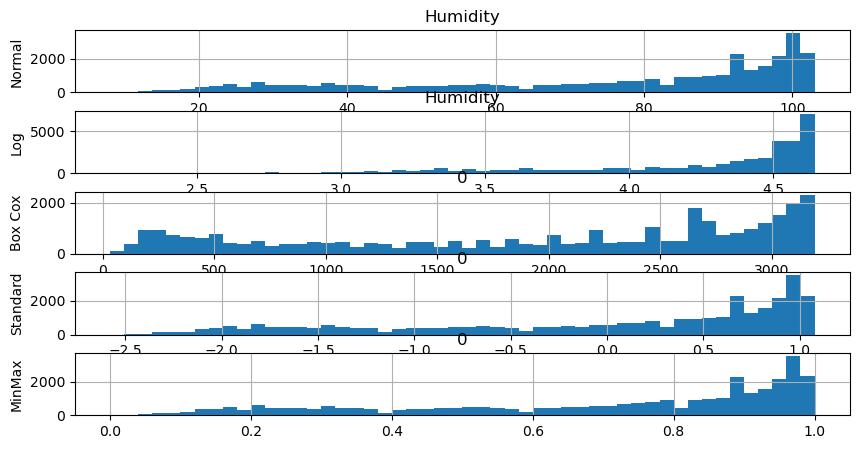

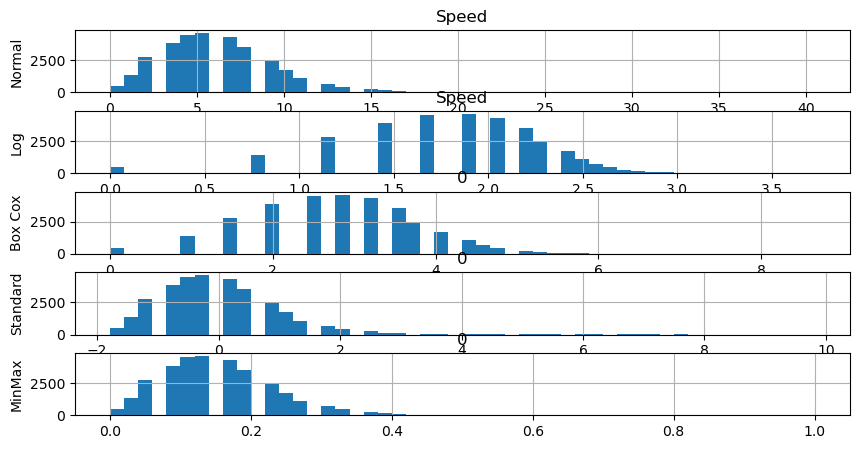

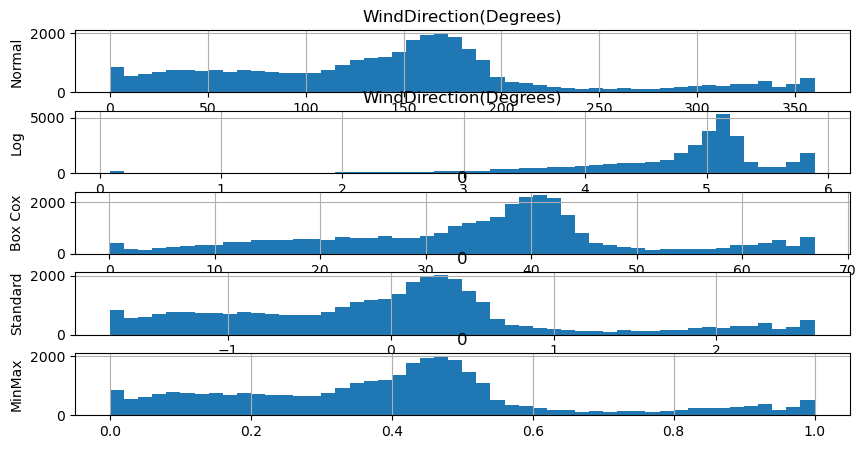

In [30]:
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
    
    pd.DataFrame(input_features[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((input_features[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax = ax3, bins = 50)    
    pd.DataFrame(StandardScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

In [31]:
transform = {'Temperature' : (input_features['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(input_features['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(input_features['Humidity']+1)[0], 
            'Speed' : (input_features['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(input_features['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    input_features[i] = transform[i]

C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [32]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,second,risehour,riseminuter,sethour,setminute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24,6,13,18,13


### Preparing Data-Splitting  and Standarddisation

In [34]:
x_train,x_test,y_train,y_test=train_test_split(input_features,target_count,test_size=0.2)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### Xgboost Model

In [35]:
from xgboost import XGBRegressor
params={'learning_rate':0.1,'max_depth':8}
model=XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [36]:
mse=mean_absolute_error(y_test,y_pred)
mse

3707.0742149718785

In [37]:
r2_score(y_test,y_pred)

0.933679982847734

### Multi layer perceptron

In [38]:
model = None
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dropout(0.33))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))
    
model.compile(metrics='mse', loss='mae', optimizer=Adam(learning_rate=0.001))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [39]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50


736/736 [==============================] - 22s 15ms/step - loss: 16090.5869 - mse: 892622400.0000 - val_loss: 10331.0791 - val_mse: 357387264.0000
Epoch 2/50
736/736 [==============================] - 10s 13ms/step - loss: 10274.8926 - mse: 359319040.0000 - val_loss: 9297.6543 - val_mse: 304510880.0000
Epoch 3/50
736/736 [==============================] - 6s 9ms/step - loss: 9841.4209 - mse: 337448256.0000 - val_loss: 8847.9414 - val_mse: 280119264.0000
Epoch 4/50
736/736 [==============================] - 8s 10ms/step - loss: 9588.4688 - mse: 327402048.0000 - val_loss: 8497.8760 - val_mse: 264590128.0000
Epoch 5/50
736/736 [==============================] - 8s 11ms/step - loss: 9295.2861 - mse: 312616096.0000 - val_loss: 8226.5615 - val_mse: 253506832.0000
Epoch 6/50
736/736 [==============================] - 6s 9ms/step - loss: 9089.3643 - mse: 300839424.0000 - val_loss: 7904.0928 - val_mse: 239377920.0000
Epoch 7/50
736/736 [==============================] - 6s 9ms/step

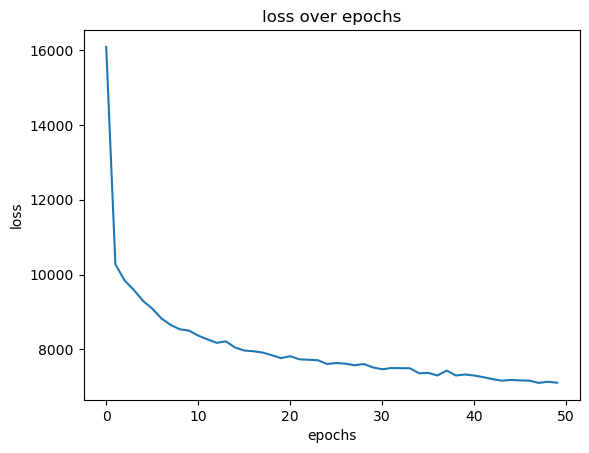

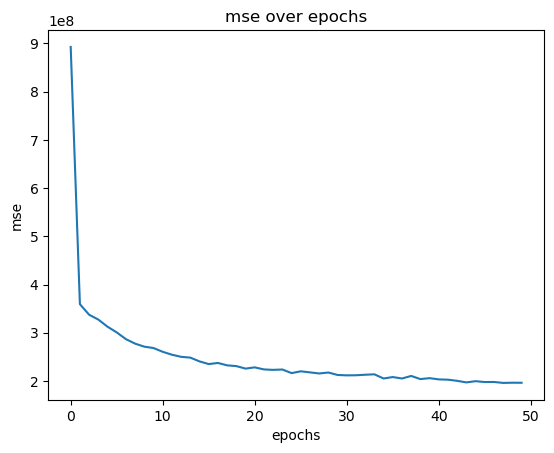

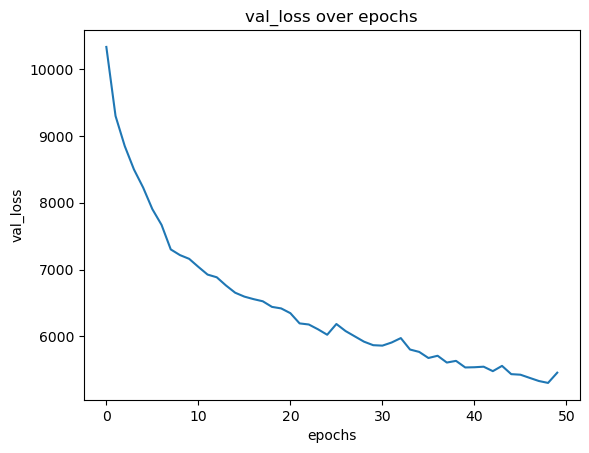

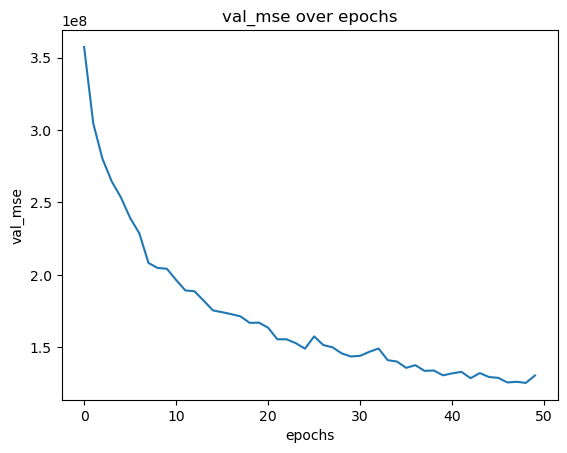

In [40]:
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()